In [1]:
import numpy as np
import networkx as nx
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes
from sklearn import preprocessing
import random

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
G = nx.karate_club_graph()

walks =[]
for i in range(10):
    for node in G.nodes():
        walk = [node]
        next_node = node
        for j in range(10):
            next_node = random.choice(G.neighbors(next_node))
            walk.append(next_node)
        walks.append(walk)

walks = [map(str, walk) for walk in walks]

walksA = np.random.permutation(walks)
walksB = np.random.permutation(walks)

modelA = Word2Vec(walksA.tolist(), size=2, window=10, min_count=0, sg=1, workers=8, iter=50)
modelB = Word2Vec(walksB.tolist(), size=2, window=10, min_count=0, sg=1, workers=8, iter=50)

w_a = np.asarray([modelA[str(node)] for node in G.nodes()])
w_b = np.asarray([modelB[str(node)] for node in G.nodes()])

In [13]:
def plot_w(a,b):
    plt.scatter(a[:,0], a[:,1],color="red")
    plt.scatter(b[:,0], b[:,1],color="blue")

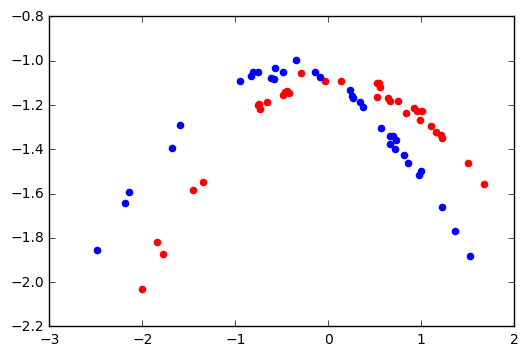

In [14]:
plot_w(w_a, w_b)

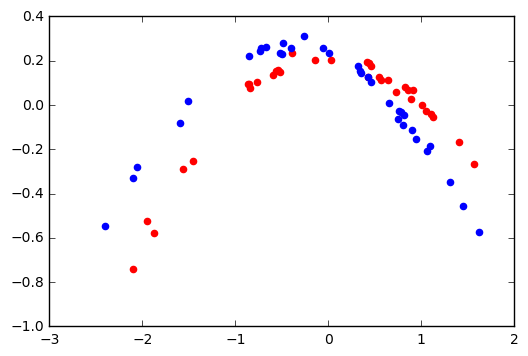

In [15]:
plot_w(w_a - w_a.mean(0), w_b - w_b.mean(0))

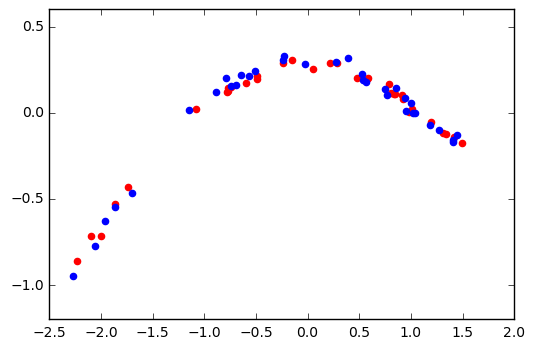

In [31]:
def procrustes_align(base_embed, other_embed):
    """ 
        Align other embedding to base embeddings via Procrustes.
        Returns best distance-preserving aligned version of other_embed
        NOTE: Assumes indices are aligned
    """
    basevecs = base_embed - base_embed.mean(0)
    othervecs = other_embed - other_embed.mean(0)
    m = othervecs.T.dot(basevecs)
    u, _, v = np.linalg.svd(m) 
    ortho = u.dot(v)
    fixedvecs = othervecs.dot(ortho)
    
    base_embed = base_embed-base_embed.mean(0)
    fixedvecs = fixedvecs - fixedvecs.mean(0)
    
    return base_embed, fixedvecs

w_a_alligned, w_b_alligned = procrustes_align(w_a, w_b)
plot_w(w_a_alligned, w_b_alligned)

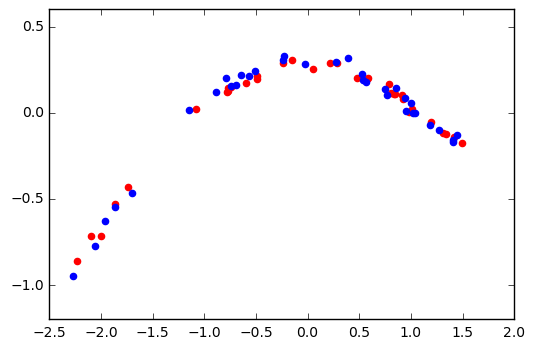

In [30]:
plot_w(w_a-w_a.mean(0), w_b_alligned - w_b_alligned.mean(0))

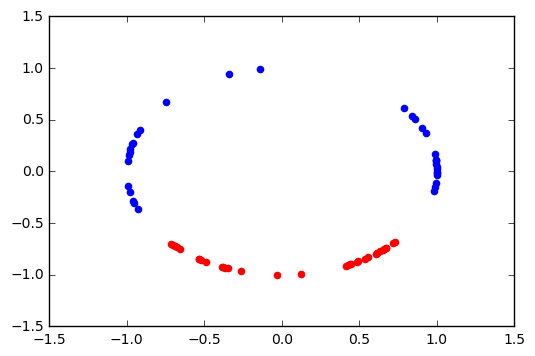

In [18]:
plot_w(preprocessing.normalize(w_a), preprocessing.normalize(w_b_alligned))

# scipy.linalg.spatial.proclusters

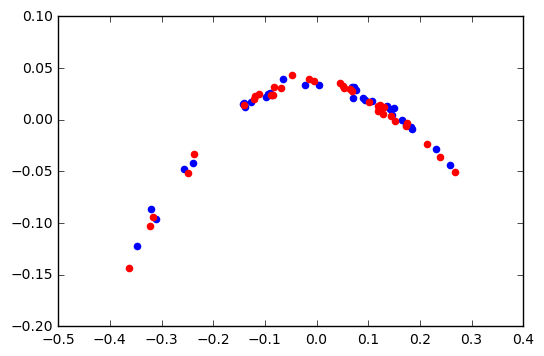

In [22]:
a,b,_ = procrustes(w_a, w_b)
plt.scatter(a[:,0], a[:,1],color="blue")
plt.scatter(b[:,0], b[:,1],color="red")

# scipy.linalg.orthogonal_proclusters

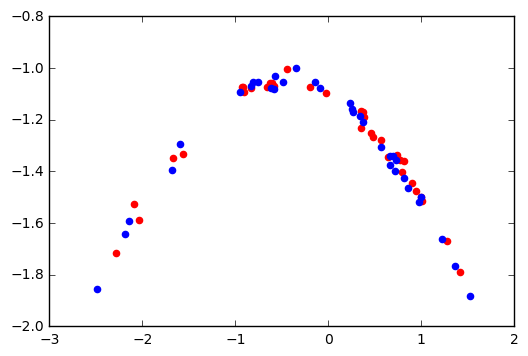

In [23]:
r, _ = orthogonal_procrustes(w_a, w_b)

w_a_alligned = w_a.dot(r)
plot_w(w_a_alligned, w_b)

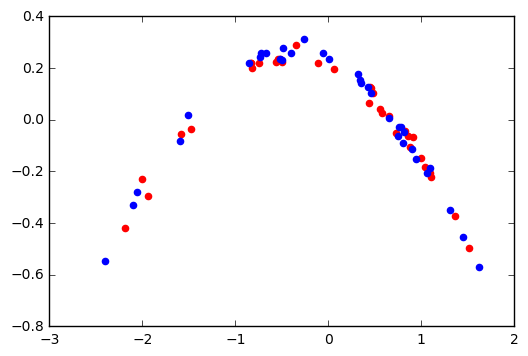

In [24]:
plot_w(w_a_alligned - w_a_alligned.mean(0), w_b - w_b.mean(0))

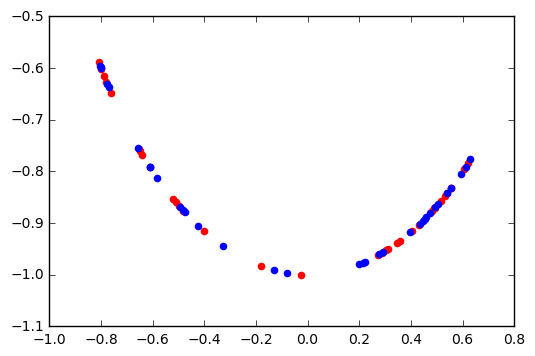

In [25]:
plot_w(preprocessing.normalize(w_a_alligned), preprocessing.normalize(w_b))